In [188]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


/media/ezequiel/Datos/GIT/metodos-numericos-grupo-4/tp2/notebooks
Python 3.8.5


In [189]:
%load_ext autoreload
%autoreload 2

df_train = pd.read_csv("../data/train.csv")
df_train = df_train[:5000]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Uso values para mandar todo a arrays de numpy
train_images = df_train[df_train.columns[1:]].values
train_labels = df_train["label"].values.reshape(-1, 1)

train_images.shape, train_labels.shape

((5000, 784), (5000, 1))

### Conseguimos los autovalores mediante deflacion (usando PCA modificado)

In [6]:
import metnum

pca = metnum.PCA(784)
eigenvalues, eigenvectors = pca.fit(train_images)

## Teorema espectral

### Sumatoria de autovalores

In [190]:
sum = 0
for each in eigenvalues:
    sum = sum + each

### Porcentaje de incidencia de cada autovalor

In [191]:
index = 1
percentages = []
for eigenvalue in eigenvalues:
    percentages.append(('# '+str(index), eigenvalue / sum))
    index = index+1

In [192]:
percentages[:5]

[('# 1', 0.0969871621434944),
 ('# 2', 0.07114450901994854),
 ('# 3', 0.061018055146488316),
 ('# 4', 0.0552675483586959),
 ('# 5', 0.048505849727955394)]

### Chequeo que la suma de los porcentajes obtenidos represente el 100%

In [193]:
total_percentage = 0
for index, percentage in percentages:
    total_percentage = total_percentage + percentage
total_percentage

0.999999999999998

### Divido los porcentajes en contenedores de interes

In [194]:
# Los 10 primeros de forma individual
plot_percentages = percentages[:10]

# Los siguientes 30, en grupos de 5
step = 5
limits = list(range(11,41,step))
for limit in limits:
    tail_percentage = 0
    for index, percentage in percentages[limit-1:limit+step-1]:
        tail_percentage = tail_percentage + percentage
    plot_percentages.append((str(limit)+' al '+str(limit+step-1), tail_percentage))

# Los restantes, todos en un único grupo
tail_percentage = 0
for index, percentage in percentages[40:]:
    tail_percentage = tail_percentage + percentage
plot_percentages.append(('41 al 784', tail_percentage))

### Genero el dataframe

In [176]:
labels = ['#autovalor', 'porcentaje']
data = np.array(plot_percentages)
data = pd.DataFrame.from_records(data, columns=labels)

### Genero el gráfico

In [195]:
colors = [plt.cm.get_cmap('Blues')(index*6) for index in range(limit)]
colors.reverse()

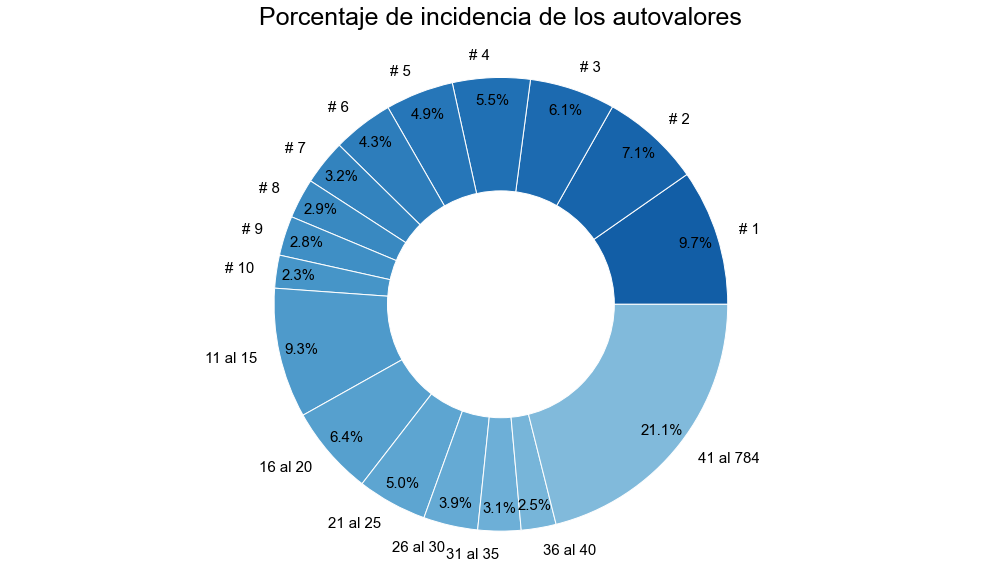

In [197]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[14,8])
plt.pie(x=data["porcentaje"], autopct='%1.1f%%', labels=list(data["#autovalor"]), pctdistance=0.9, textprops={'fontsize': 15, 'color':"black"}, colors=colors)
plt.title("Porcentaje de incidencia de los autovalores", fontsize=25, color='black', pad=30);

centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.tight_layout()